## 07_ Decision Tree Classifier

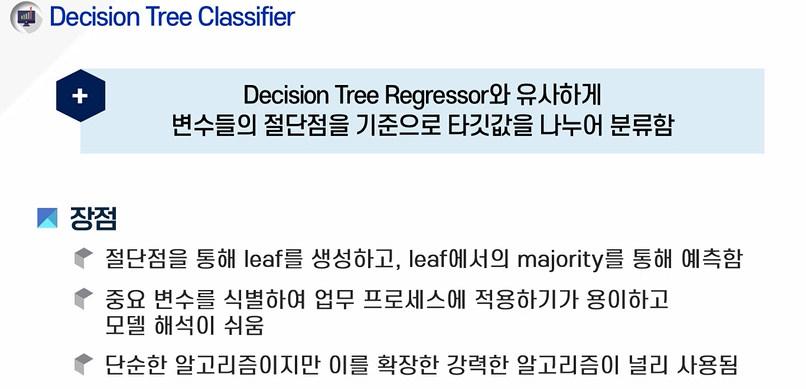

In [1]:
# 이미지 넣기 
from IPython.display import Image
Image("img/img07_01.png")

### majority(그 집단의 다수)를 뜻한다.

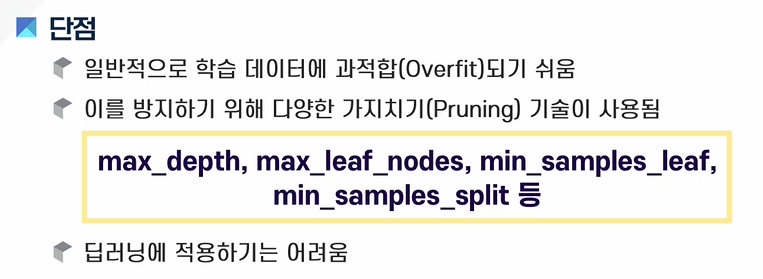

In [2]:
Image("img/img07_02.png")

###  주의) 다른 선형 분류기와 달리 스케일링이 필요하지 않음

In [15]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.tree import DecisionTreeClassifier

# 데이터 로드 및 초기 확인
titanic = sns.load_dataset('titanic')

# 중복된 데이터 제거
prep_data = titanic.drop(columns=['alive', 'who', 'adult_male', 'class', 'embark_town'])
prep_data.drop("deck", axis=1, inplace=True)

# 결측치를 정리하자
# embarked(항구정보) 열의 결측값을 'na'로 채우기
prep_data["embarked"] = prep_data.embarked.fillna('na')

# 나이의 결측값을 평균값으로 대체
prep_data["age"] = prep_data.age.transform(lambda x: x.fillna(x.mean()))

le = LabelEncoder()
prep_data['sex'] = le.fit_transform(prep_data['sex'])
prep_data['alone'] = le.fit_transform(prep_data['alone'])

prep_data = pd.get_dummies(prep_data, prefix='', prefix_sep='').astype(int)

X_train, X_test, y_train, y_test = train_test_split(prep_data.iloc[:, 1:], 
                                                   prep_data.iloc[:, 0],
                                                   random_state=42)

# 특징(feature)와 레이블(label) 분리 및 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(prep_data.iloc[:, 1:], 
                                                   prep_data.iloc[:, 0],
                                                   random_state=42)

# 스케일링
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 정확도 구하기
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.8071748878923767

###  주의) 다른 선형 분류기와 달리 스케일링이 필요하지 않음

In [9]:
# 정확도 구하기
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.8071748878923767

In [16]:
clf = DecisionTreeClassifier(max_depth=4)
# 스케일링이 필요하지 않음
# clf.fit(X_train_scaled, y_train)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8071748878923767

###  max_depth를 늘리면 학습데이터에 대한 정확도는 올라가고, 테스트 데이터에 대해서는 더 안 좋을 수 있음

In [11]:
clf3 = DecisionTreeClassifier(max_depth=6)
clf3.fit(X_train, y_train)
clf3.score(X_test, y_test)

0.7802690582959642

### K-겹 교차 검증 수행 (depth 선택)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, RobustScaler

# 스케일링
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 결정 트리 모델 정의
clf = DecisionTreeClassifier(max_depth=4)

# K-겹 교차 검증 수행 (예: k=5)
cv_scores = cross_val_score(clf, X_scaled, y, cv=5)

# 결과 출력
print("max_depth = 4")
print(f"K-겹 교차 검증 점수: {cv_scores}")
print(f"평균 교차 검증 점수: {cv_scores.mean()}")
print("=======================================================================================")

# 결정 트리 모델 정의
clf = DecisionTreeClassifier(max_depth=6)

# K-겹 교차 검증 수행 (예: k=5)
cv_scores = cross_val_score(clf, X_scaled, y, cv=5)

# 결과 출력
print("max_depth = 6")
print(f"K-겹 교차 검증 점수: {cv_scores}")
print(f"평균 교차 검증 점수: {cv_scores.mean()}")

max_depth = 4
K-겹 교차 검증 점수: [0.79888268 0.82022472 0.80898876 0.78651685 0.85393258]
평균 교차 검증 점수: 0.813709120582512
max_depth = 6
K-겹 교차 검증 점수: [0.79329609 0.80898876 0.83707865 0.78089888 0.83146067]
평균 교차 검증 점수: 0.810344611135522


###  max_depth = 4  가 교차 검증 검수가 높으므로  4 더 나은 선택